In [1]:
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import clear_output
import time

In [2]:
def func(x):
    return np.exp(-x) - x 

In [3]:
def Muller(f,x0,x1,itmax = 10, tolerancia=1e-15):
    
    # Geometry
    l0,l1 = x0,x1
    
    error = 1
    it = 0
    
    # Tercer punto igual al punto medio
    x2 = (x0 + x1)/2. 
    
    while error > tolerancia and it < itmax:
        
        clear_output(wait=True)
        
        fig = plt.figure(figsize=(4,4))
        ax = fig.add_subplot(111)
        
        ax.set_xlim(l0,l1)
        ax.set_ylim(l0,l1)
  
        
        # Primera diferencia dividida
        d1 = (f(x1) - f(x0))/(x1-x0)
        d2 = (f(x2) - f(x1))/(x2-x1)
        
        # Segunda diferencia dividida
        dd2 = (d2-d1)/(x2-x0)
        
                
        a = dd2
        b = d1 - (x0+x1)*dd2
        c = f(x0) - x0*d1 + x0*x1*dd2
        
        
        if b < 0:
            x3 = (-2*c)/(b-np.sqrt(b**2-4*a*c))
        elif b >= 0:
            x3 = (-2*c)/(b+np.sqrt(b**2-4*a*c))
        
        error = np.abs( f(x3) )
        print(x0,x1,x2)
        print('Error: ', error)
        
        # Plotter root 
        t = np.linspace(l0,l1,60)
        plt.plot(t,f(t),color='k',label='Real model')
        
        
        # Pintamos modelo cuadratico
        ax.scatter([x0,x1,x2],[f(x0),f(x1),f(x2)],marker='o',color='r',label='Interpolation model: a={}, b={}, c={}'.format(a,b,c))
        ax.plot(t,a*t**2 + b*t + c,ls='--',color='b',label='Iterations {}: root: {}, error: {}'.format(it,x3,error))
        
        ax.legend(loc='upper center', ncol=1, bbox_to_anchor=(0.5,1.3),frameon=False,fontsize=12)
        
        plt.show()
        
        
        time.sleep(0.5)
        
        # Actualizamos la siguiente iteración
         
        x0 = x1
        x1 = x2
        x2 = x3
        
        it += 1
    
    #print('Convergencia en: ',it)
        
    return x3,it

0.5677558558980593 0.5671427298716772 0.5671432904091399
Error:  1.1102230246251565e-16


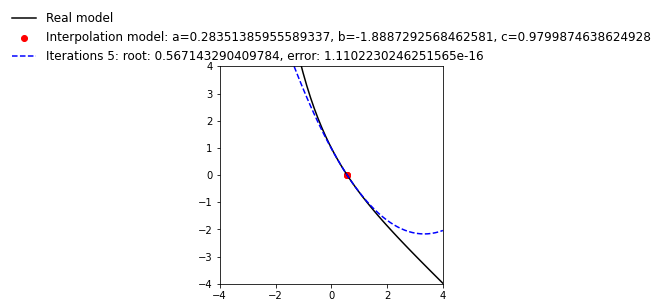

In [8]:
root, _ = Muller(func,-4,4)

In [9]:
root 

0.567143290409784

In [10]:
def Muller2(f,x0,x1,itmax = 100, tolerancia=1e-12):
    
    error = 1
    it = 0
    
    # Tercer punto igual al punto medio
    x2 = (x0 + x1)/2. 
    
    while error > tolerancia and it < itmax:
        
        clear_output(wait=True)
        
        # Primera diferencia dividida
        h1 = x1-x0
        d1 = (f(x1) - f(x0))/h1
        h2 = x2-x1
        d2 = (f(x2) - f(x1))/h2

                
        a = (d2 - d1)/(h2-h1)
        b = d2 + a*h2 
        c = f(x2) 
        
       # print(a,b,c)
        
        
        # Actualizamos la siguiente iteración
        
        if b < 0:
            x3 = x2 + (-2*c)/(b-np.sqrt(b**2-4*a*c))
        elif b >= 0:
            x3 = x2 + (-2*c)/(b+np.sqrt(b**2-4*a*c))
        
        error = np.abs( (x3-x2)/x3 )
        
        #print(error)
        print(x0,x1,x2)
        
        # Actualizamos
        x0 = x1
        x1 = x2
        x2 = x3
        
        it += 1
        
        time.sleep(1)
    
    print('Convergencia en: ', it, 'Error: ', error)
        
    return x3

In [11]:
root = Muller2(func,-20,20)
root

0.5671432412198585 0.5671432904110592 0.5671432904097838
Convergencia en:  8 Error:  0.0


0.5671432904097838